<a href="https://colab.research.google.com/github/orinbou/MathPythonColab/blob/main/chapter/%E7%AC%AC8%E5%9B%9E%E3%80%80%EF%BC%BB%E6%95%B0%E5%AD%A6%C3%97Python%EF%BC%BD%E5%86%8D%E5%B8%B0%E5%91%BC%E3%81%B3%E5%87%BA%E3%81%97%E3%82%92%E3%83%9E%E3%82%B9%E3%82%BF%E3%83%BC%E3%81%97%E3%82%88%E3%81%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 目標1： 漸化式を立てる

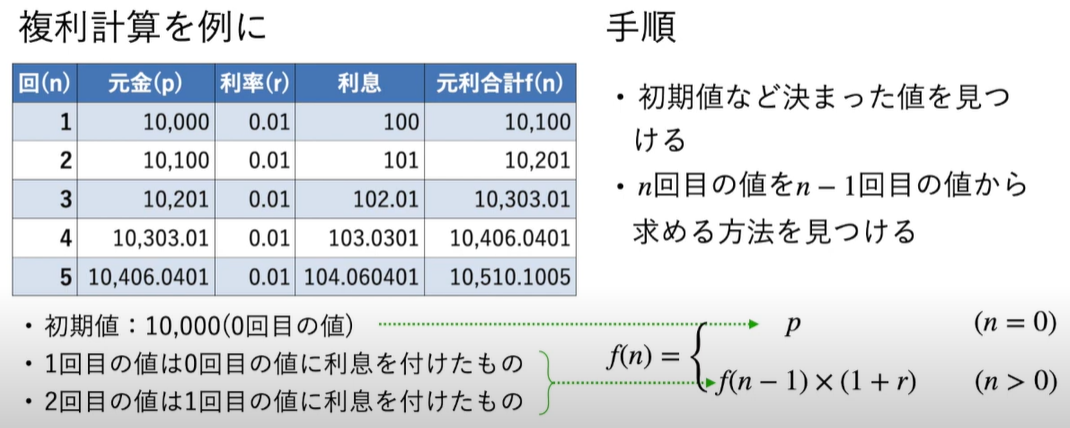

In [ ]:
%%latex
\displaystyle
f(n)=
\left\{
\begin{array}{l}
p && (n=0)
\\
f(n-1) \times (1+r) && (n>0)
\end{array}
\right.

<IPython.core.display.Latex object>

In [ ]:
def f(p, r, n):
  if n ==0:
    return p
  else:
    return f(p, r, n-1) * (1+r)

In [ ]:
# 元金10000円、利率(r=0.01)、5回目の場合
f(10000, 0.01, 5)

10510.100501

# 目標2： メモ化により計算量を減らす

## 再帰により場合の数を求める（メモ化なし）

In [ ]:
%%latex
\displaystyle
f(n)=
\left\{
\begin{array}{l}
1 && (n=1)
\\
2 && (n=2)
\\
f(n-1) + f(n-2) && (n>2)
\end{array}
\right.

<IPython.core.display.Latex object>

In [ ]:
def stairs(n):
  if n == 1 or n == 2:
    return n
  else:
    return stairs(n-1) + stairs(n-2)

In [ ]:
stairs(1)

1

In [ ]:
stairs(2)

2

In [ ]:
stairs(13)

377

## 再帰により場合の数を求める（メモ化あり）

In [ ]:
def stairs_m(n):
  memo = [None]*(n+1) #1次元ならいいが2次元の場合は注意
  return stairs_sub(n, memo)

def stairs_sub(n, memo):
  if n <= 2:
    return n
  elif memo[n] is not None:
    return memo[n]
  else:
    memo[n] = stairs_sub(n-2, memo) + stairs_sub(n-1, memo)
    return memo[n]

In [ ]:
stairs_m(1)

1

In [ ]:
stairs_m(2)

2

In [ ]:
stairs_m(13)

377

## 再帰により場合の数を求める（メモ化あり＆関数内関数）

In [ ]:
def stairs_m2(n):
  def stairs(n):
    if n <= 2:
      return n
    elif memo[n] is not None:
      return memo[n]
    else:
      memo[n] = stairs(n-2) + stairs(n-1)
      return memo[n]

  memo = [None]*(n+1)
  return stairs(n)

In [ ]:
stairs_m2(1)

1

In [ ]:
stairs_m2(2)

2

In [ ]:
stairs_m2(13)

377

# 目標3： 動的計画法を利用して最小のコストを求める

In [ ]:
# 階段のダメージの漸化式
%%latex
\displaystyle
damage(n)=
\left\{
\begin{array}{l}
0 && (n=0)
\\
abs(d[1]-d[0]) && (n=1)
\\
min(damage(n-1)+abs(d[n]-d[n-1]),damage(n-2)+abs(d[n]-d[n-2]) && (n>1)
\end{array}
\right.

<IPython.core.display.Latex object>

In [ ]:
import random
def damage_m(n):
  def damage(n):
    if n == 0:
      memo[0] = 0
    elif n == 1:
      memo[1] = abs(d[1] - d[0])
    elif memo[n] is not None:
      pass
    else:
      memo[n] = min(damage(n-1) + abs(d[n] - d[n-1]), damage(n-2) + abs(d[n] - d[n-2]))
    return memo[n]
  
  random.seed(0)
  d = random.choices(range(0, 5), k=n+1) # 階段に記録されている値
  memo = [None]*(n+1)
  result = damage(n)
  print(d)
  print(memo)
  return result

In [ ]:
damage_m(13)

[4, 3, 2, 1, 2, 2, 3, 1, 2, 2, 4, 2, 1, 3]
[0, 1, 2, 3, 2, 2, 3, 3, 4, 4, 6, 4, 5, 5]


5

# 練習問題と解答例

## （1） 経路の数を求める

In [ ]:
# 階段のダメージの漸化式
%%latex
\displaystyle
damage(n)=
\left\{
\begin{array}{l}
1 && (r=0　or　c=0)
\\
f(r-1, c) + f(r, c-1) && (else)
\end{array}
\right.

<IPython.core.display.Latex object>

In [ ]:
def countroute_m(n, m):
  def countroute(row, col):
    if row==0 or col==0:
      return 1
    elif memo[row][col] != 1:
      return memo[row][col]
    else:
      memo[row][col] = countroute(row, col-1) + countroute(row-1, col)
      return memo[row][col]
    
  memo = [[1 for _ in range(m)] for _ in range(n)] # 記録前はすべて1
  return countroute(n-1, m-1) # インデックスの最大値を指定して呼び出す

In [ ]:
countroute_m(5, 6)

126

## （2） 最短経路の距離を求める（やや難）

In [ ]:
# 最短経路の漸化式
# ただし、goal：到着駅、start：出発駅(複数あり)、d(start, goal)：出発駅から到着駅までの距離
%%latex
\displaystyle
search(goal)=
\left\{
\begin{array}{l}
1 && (goal=吉祥寺)
\\
min(search(start[i]) + d(start[i], goal)) && (else)
\end{array}
\right.

<IPython.core.display.Latex object>

In [ ]:
def search(goal, data):
  if goal == '吉祥寺': # 始点なら0を返す
    return 0.0
  else:
    prevdata = data.get(goal) # goalの直前の駅と距離の一覧（辞書型）
    print(prevdata)
    w = []
    for start in prevdata.keys():
      # 直前の駅までの最短距離を再帰的に求める
      w.append(search(start, data) + prevdata.get(start)) # 最短距離の候補を記録
    return min(w) # 候補の中で最短のものを返す

In [ ]:
distance = {'吉祥寺' : {'吉祥寺': 0.0},
            '明大前' : {'吉祥寺': 7.8},
            '下北沢' : {'明大前': 1.9},
            '新宿' : {'吉祥寺': 12.2, '明大前': 5.2, '下北沢': 4.9},
            '渋谷' : {'新宿': 3.4, '下北沢': 3.0},
            '表参道' : {'渋谷': 1.3, '下北沢': 4.5}}

In [ ]:
search('表参道', distance)

{'渋谷': 1.3, '下北沢': 4.5}
{'新宿': 3.4, '下北沢': 3.0}
{'吉祥寺': 12.2, '明大前': 5.2, '下北沢': 4.9}
{'吉祥寺': 7.8}
{'明大前': 1.9}
{'吉祥寺': 7.8}
{'明大前': 1.9}
{'吉祥寺': 7.8}
{'明大前': 1.9}
{'吉祥寺': 7.8}


14.0

In [ ]:
def search_m(goal, data):
  def search(goal, data):
    if goal == '吉祥寺': # 始点なら0を返す
      return 0.0
    else:
      prevdata = data.get(goal) # goalの直前の駅と距離の一覧（辞書型）
      w = []
      for start in prevdata.keys():
        # 直前の駅までの最短距離を再帰的に求める
        if memo.get(start) is not None:
          m = memo.get(start)
        else:
          m = search(start, data)
          memo[start] = m
        w.append(m + prevdata.get(start)) # 最短距離の候補を記録
      return min(w) # 候補の中で最短のものを返す
  memo = {}
  return search(goal, data)

In [ ]:
search_m('表参道', distance)

14.0